<a href="https://colab.research.google.com/github/hyeonjun/AlphaZero/blob/master/4_4_DQN_cart_pole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DQN(Depp Q-Network)

Q 학습을 조합한 방법으로 '심층 강화 학습' 알고리즘.

Q 학습에서는 행동 가치 함수(Q 함수)를 테이블 형식으로 표현했는데, 상태의 종류가 증가하면 테이블의 행 수도 크게 증가한다.

예를 들어, 100*100 픽셀의 이미지를 상태로 한다면 테이블 형식으로 표현할 경우 10,000행의 상태를 가지게 된다. 상태 수가 많은 테이블 형식을 확실하게 학습하기 위해서는 매우 많은 학습이 필요하게 되고, 현실적으로 불가능하다.

이러한 이유로 행동 평가 함수를 '테이블 형식'이 아닌 '뉴럴 네트워크'로 표현하는 방법을 고안하여 DQN이 생겼다.

구체적으로는 입력은 '상태', 출력은 '행동'이 되는 뉴럴 네트워크로 특정한 상태에서 행동을 선택할 확률을 추론한다.

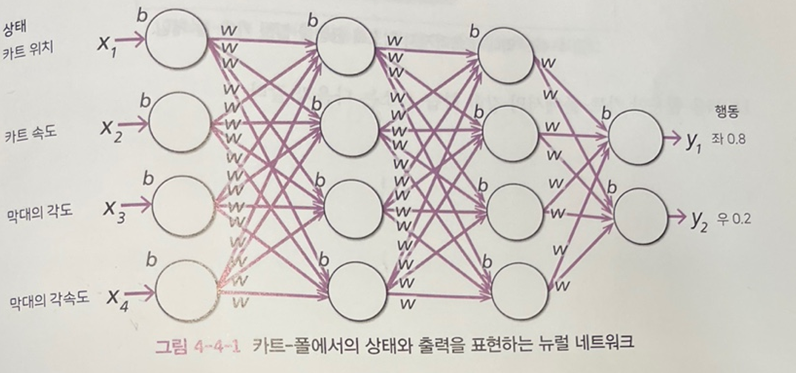

DQN으로 'OpenAI Gym'환경의 하나인 카트-폴을 공략한다.

OpenAI Gym은 비영리단체인 'OpenAI'가 제공하는 강화 학습 툴킷이다.
OpanAI에서는 강화 학습 시뮬레이션에 이용할 수 있는 다양한 환경을 제공한다. '카트-폴'은 막대를 쓰러뜨리지 않고 균형을 잡는 게임히다.


* DQN을 활용한 카트-폴에서의 강화 학습 요소

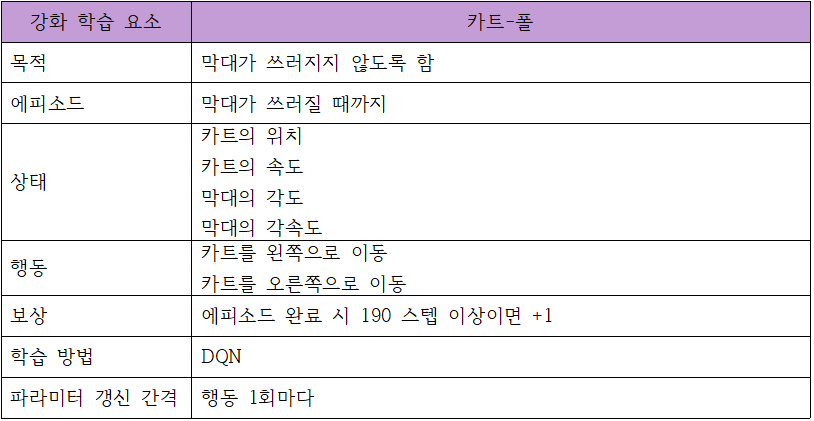


* DQN을 활용한 카트-폴에서의 강화 학습 사이클

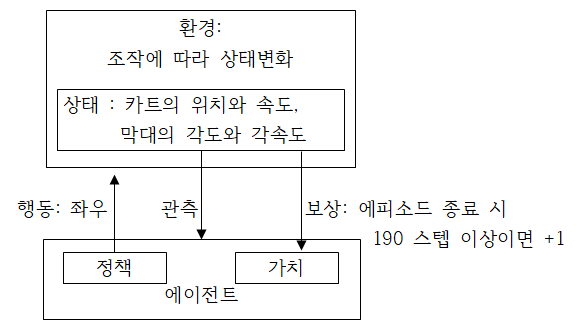

# 뉴럴 네트워크 입력과 출력

DQN에서는 Q 학습의 행동 가치 함수를 테이블 형식이 아닌 뉴럴 네트워크로 표현한다.
테이블 형식을 사용했을 때의 행동 가치 함수는 Q 학습에서의 갱신 계산식을 통해 갱신했지만, 뉴럴 네트워크에서 사용할 때의 행동 가치 함수는 뉴럴 네트워크의 학습에 따라 갱신한다.

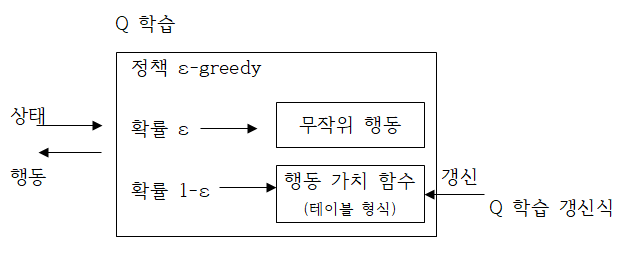

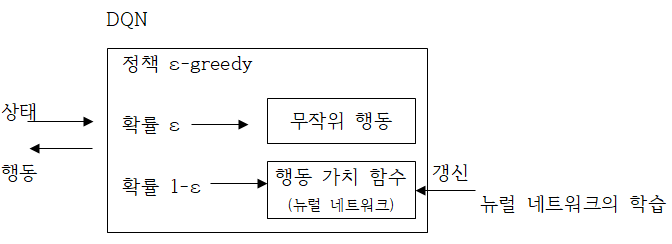


DQN에서의 뉴럴 네트워크 입력은 환경의 상태다. 카트-폴의 상태 수는 4이므로 입력 형태는 (4,)이다.

# 카트-폴에서의 상태
- 카트의 위치
- 카트의 속도
- 막대의 각도
- 막대의 가속도


DQN의 뉴럴 네트워크 출력은 행동별 가치다. 카트-폴에서의 행동 수는 2이므로 출력 형태는 (2,)가 된다.
- 카트를 왼쪽으로 이동한 가치
- 카트를 오른족으로 이동한 가치


# DQN의 4가지 기반 기술
* Experience Replay

Q 학습에서는 경험(상태, 행동, 보상, 다음 상태)을 순서를 따라 학습했다.
이 방법으로는 시간적으로 상관 관계가 높은 내용을 연속해서 학습하게 되므로 학습이 안정되지 못하는 경향이 나타난다.

DQN에서는 기억에 경험을 많이 저장한 뒤, 나중에 무작위로 학습한다. 이를 'Experience Replay'라고 한다.

* Fixed Target Q-Network

Q 학습은 행동 가치 함수 자체를 이용해 행동 가치 함수를 갱신했다. 즉, 갱신 중인 뉴럴 네트워크를 상요해서 해당 뉴럴 네트워크 갱신을 위한 계산을 하게 됨에 따라 학습이 안정되지 않는 경향이 나타난다.

DQN에서는 갱신량만을 계산하는 별도의 뉴럴 네트워크를 사용해서 이 문제를 해결했다. 이를 'Fixed Target Q-Network'라고 부른다.

갱신 대상이 되는 뉴럴 네트워크를 메인 네트워크, 갱신량을 계산하기 위한 뉴럴 네트워크를 대상 네트워크라고 부른다. 대상  네트워크는 과거의 메인 네트워크로, 일정 간격(에피소드마다)으로 메인 네트워크의 가중치를 대상 네트워크에 덮어쓰면서 갱신한다.

* Reward Clipping

환경으로부터 얻는 보상은 환경에 따라 그 스케일이 다르다. 예를 들어, Atari 게임의 퐁에서는 점수를 한 번 얻을 때마다, 1점, 스페이스 인베이더에서는 적을 물리칠 때마다 10~30점을 얻는다.

DQN에서는 이를 보완하기 위해 모든 환경에서의 보상 스케일을 -1, 0, 1로 고정한다. 이를 'Reward Clipping'이라고 부른다. 이를 통해 환경에 관계없이 동일한 하이퍼 파라미터를 사용해 학습을 수행할 수 있다.

* Huber Loss

뉴럴 네트워크 오차가 큰 경우에는 오차 함수로 평균 제곱 오차를 사용하면 출력이 너무 커져 학습이 안정되지 못하는 경향이 나타난다. DQN에서는 오차가 큰 경우에도 값이 안정되도록 휴버 함수(huber loss)를 사용한다.

In [ ]:
!pip uninstall gym
!pip install gym==0.10.11

Uninstalling gym-0.17.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/gym-0.17.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/gym/*
Proceed (y/n)? y
  Successfully uninstalled gym-0.17.3
     |████████████████████████████████| 1.5MB 7.6MB/s 
  Created wheel for gym: filename=gym-0.10.11-cp37-none-any.whl size=1588314 sha256=4042427c9ae34fa96035ba20a9a39e8fffbdace96d4bec44bce230f85f3d7f74
  Stored in directory: /root/.cache/pip/wheels/7b/eb/1f/22c4124f3c64943aa0646daf4612b1c1f00f27d89b81304ebd
Successfully built gym


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
# import package
import gym
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from collections import deque
from tensorflow.compat.v1.losses import huber_loss

In [ ]:
print(gym.__version__)

0.10.11


In [ ]:
# preparing parameter
NUM_EPISODES = 500 # 학습할 에피소드의 수
MAX_STEPS = 200 # 1 에피소드 내의 최대 스템 수
GAMMA = 0.99 # Q 학습 시의 시간 할인율
WARMUP = 10 # 환경 초기화할 때 조작하지 않는 스텝 수.
# 이를 통해 게임 시작 초기 상태에 변동을 반영해 특정한 갱신 상황에 특화해서 학습이 진행되는 것을 방지한다.

# search parameter
E_START = 1.0 # ε 초기화
E_STOP = 0.01 # ε 최종값
E_DECAY_RATE = 0.001 # ε 감쇠율

# memory parameter
MEMORY_SIZE = 10000 # 경험 메모리 사이즈
BATCH_SIZE = 32 # 배치 사이즈


# 행동 평가 함수 정의

행동 평가 함수가 되는  뉴럴 네트워크 모델을 생성한다.

전결합 레이어를 4개 겹친 모델을 사용. 입력 수는 '상태 수', 출력 수는 '행동 수'가 된다. 출력 레이어의 활성화 함수로는 'linear'를 지정한다. 이는 활성화 함수를 적용하지 않은 상태, 즉 선형 분리기가 된다. 오차 함수로는 'huber_loss'를 지정한다. 휴버 함수는 케라스에는 없는 텐서플로의 API다.


In [ ]:
# 행동 평가 함수 정의
class QNetwork:
  # 초기화
  def __init__(self, state_size, action_size):
    # 모델 생성
    self.model = Sequential()
    self.model.add(Dense(16, activation='relu', input_dim=state_size))
    self.model.add(Dense(16, activation='relu'))
    self.model.add(Dense(16, activation='relu'))
    self.model.add(Dense(action_size, activation='linear'))

    # 모델 컴파일
    self.model.compile(loss=huber_loss, optimizer=Adam(lr=0.001))


# 경험 메모리 정의

'경험 메모리'는 과거의 경험(상태, 행동, 보상, 다음 상태)을 저장하는 메모리다.

매 스텝마다 add()로 경험을 추가하고, sample()로 배치 사이즈만큼의 경험을 랜덤으로 취득해서 뉴럴 네트워크의 학습을 수행한다.

경험 메모리의 경험은 deque에 저장된다. deque는 list()와 비슷한 데이터 타입이나, 인수 maxlen 이상의 엘리먼트를 추가하려는 경우 자동적으로 맨 처음에 위치한 엘리먼트부터 차례대로 삭제한다. 즉, 오래된 경험부터 차례대로 삭제된다.


In [ ]:
# 경험 메모리 정의
class Memory():
  # 초기화
  def __init__(self, memory_size):
    self.buffer = deque(maxlen=memory_size)
  
  # 경험 추가
  def add(self, experience):
    self.buffer.append(experience)

  # 배치 사이즈만큼의 경험을 랜덤으로 얻음
  def sample(self, batch_size):
    idx = np.random.choice(np.arange(len(self.buffer)), size=batch_size, replace=False)
    return [self.buffer[i] for i in idx]
  
  # 경험 메모리 사이즈
  def __len__(self):
    return len(self.buffer)

# 환경 생성
OpenAI Gym의 환경 'Env'는 gym.make()로 생성한다. 여기서는 카트-폴의 환경을 이용하므로 인수에 'CartPole-v0'를 지정한다.

Env는 다음 두 가지 멤버 변수를 가지고 있다. 'env.action_space.n'으로 행동 수, 'env.observation_space.shape[0]'으로 상태 수를 얻는다.

* OpenAI Gym의 환경 Env의 멤버 변수

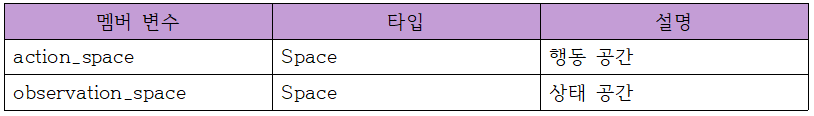

* OpenAI Gym의 환경 Env 메소드

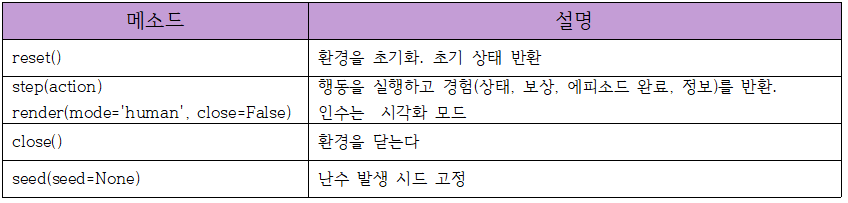

* step()의 인수 시각화 모드

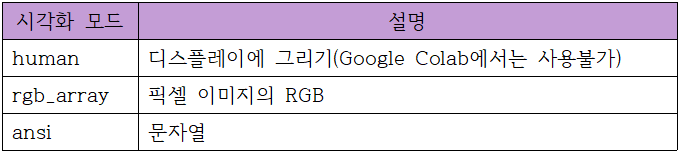

In [ ]:
# 환경 생성
env = gym.make('CartPole-v0')
state_size = env.observation_space.shape[0] # 행동 수
action_size = env.action_space.n # 상태 수

In [ ]:
# 메인 네트워크, 대상 네트워크 및 경험 메모리 생성
main_qn = QNetwork(state_size, action_size)
target_qn = QNetwork(state_size, action_size)
memory = Memory(MEMORY_SIZE)

# 학습 시작
# 환경 초기화

에피소드 시작 시 환경을 초기화한다. 환경 초기화에는 Env의 reset()을 사용한다. 반환값 상태의 형태를 모델에 전달할 데이터 타입에 맞춰 '[4](상태수) -> [1,4]([배치 크기, 상태 수])'로 변환한다.


# 에피소드 수만큼 에피소드를 반복


# 대상 네트워크 갱신

에피소드마다 메인 네트워크의 가중치를 대상 네트워크에 덮어쓰는 처리를 수행한다. 가중치 덮어쓰기는 메인 네트워크 model의 get_weights()와 대상 네트워크 model의 set_weights()로 수핸한다.


# 1 에피소드의 루프

1 에피소드만큼 게임 종료까지의 처리를 수행한다.

* ε 감소

파라미터 E_STOP, E_START, E_DECAY_RATE에 맞추어 ε를 감소시킨다.

* 무작위 또는 행동 가치 함수에 따라 행동 취득

ε와 난수에 맞추어 랜덤으로 또는 행동 가치 함수에 따라 행동을 선택한다. 랜덤 행동은 'env.action_space.sample()', 행동 가치 함수에 따른 행동은 'np.argmax(main_qn.model.predict(state)[0])'으로 얻는다.

* 행동에 맞춰 상태와 보상을 얻음

Env의 step()을 사용해 행동에 맞추어 상태와 에피소드 완료 여부를 얻는다. 카트-폴의 환경이 제공하는 보상(매번 스탭마다 1)도 취득할 수 있지만, 이번 샘플에서는 이를 사용하지 않고, 독자적인 보상(다음 에피소드 완료 시 보상)을 사용한다.

* 에피소드 완료시 처리

에피소드 완료 시 190 스텝 이상이면 보상 및 성공 횟수에 1을 더한다.
그리고 다음 상태에 '상태 없음(0만 있는 배열)'을 대입하고, 경험 메모리에 '경험'을 추가한다. 경험은 스텝 수가 'WARMUP'이상인 경우에만 추가한다.

* 에피소드 완료 불가 시 처리

에피소드가 완료되지 않는 경우, 즉 보통의 스텝 실행 시에는 보상으로 0을 지정한다. 그리고 경험 메모리에 '경험'을 추가한다. 이 경험 역시 스텝 수가 'WARMUP' 이상인 경우에만 추가한다. 성공한 경우는 보상 1, 이외는 0이라는 경험을 축적하여 학습에 활용



# 에피소드 완료 시 로그 표시

1 에피소드 완료 후 에피소드 번호, 스텝 수, ε의 로그를 표시한다. 그 후, 5회 연속 성공(스텝 수가 190 이상인 경우를 성공이라 함)하면 학습 완료, 그렇지 않으면 다음 에피소드를 수행하기 위해 '환경 초기화'를 수행한다.


# 행동 가치 함수 갱신
경험 메모리 수가 배치 사이즈 이상인 경우, 행동 가치 함수인 메인 네트워크를 갱신한다.

1. 뉴럴 네트워크 입력과 출력 준비

뉴럴 네트워크의 입력 'inputs'와 출력 'targets'를 준비한다. 뉴럴 네트워크의 입력은 '상태', 형태는 '(배치 사이즈, 4)', 출력은 '행동별 가치'이며, 형태는 '(배치 사이즈, 2)'다. 초기값은 모두 0.

2. 배치 사이즈만큼 경험을 랜덤으로 취득
3. 뉴럴 네트워크의 입력과 출력 생성

얻어낸 경험으로부터 상태(state_b), 행동(action_b), 보상(reward_b), 다음 상태(next_state_b)를 1 세트씩 꺼낸다. 이 값을 사용해 뉴럴 네트워크의 입력 'inputs'와 출력 'outputs'의 내용을 생성한다.

* 입력에 상태 지정

inputs[i]dp 'state_b'를 대입한다.

* 선택한 행동의 가치 계산

선택한 행동의 가치를 계산한다. 다음 행동이 존재하지 않는 경우에는 target에 'reward_b', 다음 행동이 존재하는 경우에는 target에 아래 식으로 계산한 가치를 대입한다. 이는 뉴럴 네트워크가 원래 출력하고자 하는 값이 된다.

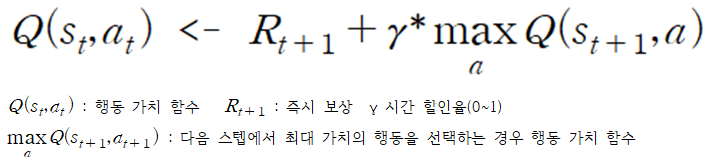

* 출력에 행동별 가치 지정

targets[i]에 행동 가치 함수 메인 네트워크에서 추론한 '행동별 가치(학습 전의 추론 결과)'를 대입한다.그리고 targets[i][action_b]에 앞서 계산한 선택한 행동의 가치를 대입한다.

4. 행동 가치 함수 갱신

생성한 뉴럴 네트워크의 입력과 출력을 사용해 행동 가치 함수 메인 네트워크를 학습시킨다.

In [ ]:
# 학습 개시

# 환경 초기화
state = env.reset()
state = np.reshape(state, [1, state_size])

# 에피소드 수 만큼 메피소드 반복
total_step = 0 # 총 스텝 수
success_count = 0 # 성공 수
for episode in range(1, NUM_EPISODES+1):
    step = 0 # 스텝 수
    
    # 대상 네트워크 갱신
    target_qn.model.set_weights(main_qn.model.get_weights())
    
    # 1 에피소드 루프
    for _ in range(1, MAX_STEPS+1):
        step += 1
        total_step += 1

        # ε를 감소시킴
        epsilon = E_STOP + (E_START - E_STOP)*np.exp(-E_DECAY_RATE*total_step)
        
        # 랜덤하게 생동 선택
        if epsilon > np.random.rand():
            action = env.action_space.sample()
        # 행동 가치 함수에 따른 행동 선택
        else:
            action = np.argmax(main_qn.model.predict(state)[0])

        # 행동에 맞추어 상태와 보상을 얻음
        next_state, _, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])

        # 에피소드 완료 시
        if done:
            # 보상 지정
            if step >= 190:
                success_count += 1
                reward = 1
            else:
                success_count = 0
                reward = 0
            
            # 다음 상태에 상태 없음을 대입
            next_state = np.zeros(state.shape)
            
            # 경험 추가
            if step > WARMUP:
                memory.add((state, action, reward, next_state))                        
        # 에피소드 미완료 시
        else:
            # 보상 지정
            reward = 0
                
            # 경험 추가
            if step > WARMUP:
                memory.add((state, action, reward, next_state))
            
            # 상태에 다음 상태 대입
            state = next_state

        # 행동 평가 함수 갱신
        if len(memory) >= BATCH_SIZE:
            # 뉴럴 네트워크의 입력과 출력 준비
            inputs = np.zeros((BATCH_SIZE, 4)) # 입력(상태)
            targets = np.zeros((BATCH_SIZE, 2)) # 출력(행동별 가치)

            # 배치 사이즈 만큼 경험을 랜덤하게 선택
            minibatch = memory.sample(BATCH_SIZE)
            
            # 뉴럴 네트워크 입력과 출력 생성
            for i, (state_b, action_b, reward_b, next_state_b) in enumerate(minibatch):
                
                # 입력 상태 지정
                inputs[i] = state_b
                
                # 선택한 행동의 가치 계산
                if not (next_state_b == np.zeros(state_b.shape)).all(axis=1):
                    target = reward_b + GAMMA * np.amax(target_qn.model.predict(next_state_b)[0])
                else:
                    target = reward_b

                # 출력에 행동 별 가치를 지정
                targets[i] = main_qn.model.predict(state_b)
                targets[i][action_b] = target # 선택한 행동의 가치

            # 행동 가치 함수 갱신
            main_qn.model.fit(inputs, targets, epochs=1, verbose=0)
        
        # 에피소드 완료 시
        if done:
            # 에피소드 루프 이탈
            break
           
    # 에피소드 완료 시 로그 표시
    print('에피소드: {}, 스텝 수: {}, epsilon: {:.4f}'.format(episode, step, epsilon))

    # 5회 연송 성공으로 학습 완료
    if success_count >= 5:
        break

    # 환경 초기화
    state = env.reset()
    state = np.reshape(state, [1, state_size])

에피소드: 1, 스텝 수: 15, epsilon: 0.9853
에피소드: 2, 스텝 수: 9, epsilon: 0.9765
에피소드: 3, 스텝 수: 19, epsilon: 0.9583
에피소드: 4, 스텝 수: 14, epsilon: 0.9451
에피소드: 5, 스텝 수: 16, epsilon: 0.9303
에피소드: 6, 스텝 수: 28, epsilon: 0.9049
에피소드: 7, 스텝 수: 17, epsilon: 0.8898
에피소드: 8, 스텝 수: 44, epsilon: 0.8519
에피소드: 9, 스텝 수: 33, epsilon: 0.8246
에피소드: 10, 스텝 수: 19, epsilon: 0.8093
에피소드: 11, 스텝 수: 26, epsilon: 0.7888
에피소드: 12, 스텝 수: 22, epsilon: 0.7718
에피소드: 13, 스텝 수: 41, epsilon: 0.7412
에피소드: 14, 스텝 수: 50, epsilon: 0.7056
에피소드: 15, 스텝 수: 15, epsilon: 0.6952
에피소드: 16, 스텝 수: 12, epsilon: 0.6870
에피소드: 17, 스텝 수: 21, epsilon: 0.6730
에피소드: 18, 스텝 수: 20, epsilon: 0.6598
에피소드: 19, 스텝 수: 35, epsilon: 0.6375
에피소드: 20, 스텝 수: 40, epsilon: 0.6129
에피소드: 21, 스텝 수: 77, epsilon: 0.5682
에피소드: 22, 스텝 수: 27, epsilon: 0.5533
에피소드: 23, 스텝 수: 22, epsilon: 0.5415
에피소드: 24, 스텝 수: 35, epsilon: 0.5232
에피소드: 25, 스텝 수: 42, epsilon: 0.5021
에피소드: 26, 스텝 수: 61, epsilon: 0.4730
에피소드: 27, 스텝 수: 69, epsilon: 0.4421
에피소드: 28, 스텝 수: 87, epsilon: 0.4061
에피

# 디스플레이 설정

OpenAI Gym을 로컬에서 실행하면 스텝마다 Env의 render()를 호출해서 다른 윈도우 화면에서 환경을 표시할 수 있다. 하지만 Google Colab과 같이 클라우드에서 실행하는 경우에는 화면을 표시할 수 없으며, 에러가 발생한다.

그래서 다음 방법으로 디스플레이 설정을 수행한다.

Xvfb(X virtual framebuffer)는 X 윈도우 시스템의 가상 디스플레이를 만들어 주는 소프트웨어다. 이를 활용해 실제 스크린이 없는  상황에서라도 GUI가 필요한 프로그램을 실행할 수 있다.

'pyvirtualdisplay'는 파이썬에서 가상 디스플레이(Xvfb)를 생성하는 패키지다.

In [ ]:
# 디스플레이 설정 인스톨
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg x11-utils > /dev/null
!pip install pyglet==1.3.2
!pip install pyopengl
!pip install pyvirtualdisplay

# 디스플레이 설정 적용
from pyvirtualdisplay import Display
import os
disp = Display(visible=0, size=(1024, 768))
disp.start()
os.environ['DISPLAY'] = ':' + str(disp.display) + '.' + str(disp._obj._screen)


In [ ]:
# 애니메이션 프레임 생성
# 1 에피소드만큼 게임을 실행해서 스텝 수 만큼의 화면 이미지를 수집한다. Env의 render(mode='rgb_array')를 호출해 화면의 이미지를 취득할 수 있다.
# 평가
frames = [] # 애니메이션 프레임

# 환경 초기화
state = env.reset()
state = np.reshape(state, [1,state_size])

# 1 에피소드 루프
step = 0 # 스텝 수
for _ in range(1, MAX_STEPS+1):
  step += 1

  # 애니메이션 프레임 추가
  frames.append(env.render(mode='rgb_array'))

  # 최적 행동 선택
  action = np.argmax(main_qn.model.predict(state)[0])

  # 행동에 맞추어 상황과 보상을 얻음
  next_state, reward, done, _ = env.step(action)
  next_state = np.reshape(next_state, [1, state_size])

  # 에피소드 완료 시
  if done:
    # 다음 상태에 상태 없음을 대입
    next_state = np.zeros(state.shape)

    # 에피소드 루프 이탈
    break
  else:
    # 상태에 다음 상태 대입
    state = next_state

# 에피소드 완료 시 로그 표시
print('steps : {}'.format(step))


# 애니메이션 프레임을 애니메이션으로 변환
애니메이션 프레임을 애니메이션으로 변환하는 경우, 'JSAnimation'을 사용한다.
JSAnimation은 matplotlib에서 javascript 애니메이션을 생성하는 패키지다.

애니메이션을 관리하는 'FuncAnimation' 객체를 생성한다. FuncAnimation의 인수로 figure 객체, 애니메이션 정기 처리, 프레임 수 및 1 프레임의 시간을 지정한다. 현재 figure 객체는 plt.gcf()로 얻어낸다.

이를 변경함으로써 애니메이션 표시 내용도 변경된다. 애니메이션의 정기 정기 처리에서는 frames의 이미지를 순서대로 표시한다.

그리고 display_animation()으로 HTML 객체를 생성하고, display()로 HTML 객체를 노트북 상에 표시한다.

In [ ]:
# JSAnimation 설치
!pip install JSAnimation

# 패키지 임포트
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation
from IPython.display import HTML

# 애니메이션 재생 정의
def display_frames_as_gif(frames):
  plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72)
  patch=plt.imshow(frames[0])
  plt.axis('off')

  # 애니메이션 정기 처리
  def animate(i):
    patch.set_data(frames[i])
  
  # 애니메이션 재생
  anim=animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
  display(display_animation(anim, default_mode='loop'))

# 애니메이션 재생
display_frames_as_gif(frames)
